In [1]:
import numpy as np
import jax
import matplotlib
from matplotlib import pyplot as plt
import jax.numpy as jnp
from jax import jit, grad, vmap
from jax import random

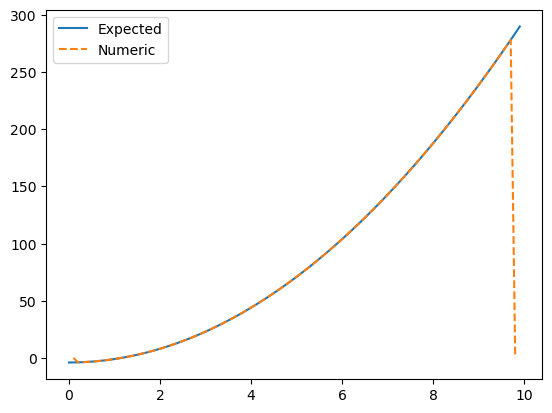

In [128]:
x = 0.1 * np.arange(100)
y = x ** 3 - 4 * x
dy = 3 * x ** 2 - 4


def my_diff(a):
    a_p = a[2:]
    a_m = a[:-2]
    return a_p - a_m
#

def space_centrad_diff(x, y):
    dx = my_diff(x)
    dy = my_diff(y)
    diff = dy / dx
    diff = diff.at[0].set(0.)
    diff = diff.at[-1].set(0.)
    return diff
#

def matrix_example(A, B):
    return A @ B
#

A = np.random.rand(20, 20)
B = np.random.rand(20, 20)


dy_num = space_centrad_diff(jnp.asarray(x), jnp.asarray(y))

plt.plot(x, dy, label="Expected")
plt.plot(x[1:-1], dy_num, label="Numeric", linestyle='--')

plt.legend()
plt.show()






    





In [102]:
cjaxpr = jax.make_jaxpr(space_centrad_diff)(x, y)
jaxpr  = cjaxpr.jaxpr

In [103]:
cjaxpr.jaxpr.invars[0].

SyntaxError: invalid syntax (1085581943.py, line 1)

In [118]:
cjaxpr.eqns[9].invars[0].val

-1

In [104]:
print(jaxpr)

{ lambda ; a:f32[100] b:f32[100]. let
    c:f32[98] = slice[limit_indices=(100,) start_indices=(2,) strides=None] a
    d:f32[98] = slice[limit_indices=(98,) start_indices=(0,) strides=None] a
    e:f32[98] = sub c d
    f:f32[98] = slice[limit_indices=(100,) start_indices=(2,) strides=None] b
    g:f32[98] = slice[limit_indices=(98,) start_indices=(0,) strides=None] b
    h:f32[98] = sub f g
    i:f32[98] = div h e
    j:i32[1] = broadcast_in_dim[broadcast_dimensions=() shape=(1,)] 0
    k:f32[98] = scatter[
      dimension_numbers=ScatterDimensionNumbers(update_window_dims=(), inserted_window_dims=(0,), scatter_dims_to_operand_dims=(0,))
      indices_are_sorted=True
      mode=GatherScatterMode.FILL_OR_DROP
      unique_indices=True
      update_consts=()
      update_jaxpr=None
    ] i j 0.0
    l:i32[] = add -1 98
    m:i32[] = convert_element_type[new_dtype=int32 weak_type=False] l
    n:i32[1] = broadcast_in_dim[broadcast_dimensions=() shape=(1,)] m
    o:f32[98] = scatter[
    

In [121]:
cjaxpr.jaxpr.constvars

[]

In [129]:
cjaxprM = jax.make_jaxpr(matrix_example)(A, B)
jaxprM  = cjaxprM.jaxpr

In [130]:
print(cjaxprM)

{ lambda ; a:f32[20,20] b:f32[20,20]. let
    c:f32[20,20] = dot_general[
      dimension_numbers=(([1], [0]), ([], []))
      preferred_element_type=float32
    ] a b
  in (c,) }
